## Importing Required Libraries and Reading Data
We import necessary libraries and load the Titanic dataset to inspect the first few rows.


In [3]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'C:/Users/ACER/Downloads/archive (11)/Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning and Preprocessing
We handle missing values, create new features, drop unnecessary columns, and encode categorical variables.


In [5]:
# Fill missing values
imputer_age = SimpleImputer(strategy='median')
titanic_data['Age'] = imputer_age.fit_transform(titanic_data[['Age']]).ravel()
imputer_embarked = SimpleImputer(strategy='most_frequent')
titanic_data['Embarked'] = imputer_embarked.fit_transform(titanic_data[['Embarked']]).ravel()

# Feature Engineering
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['IsAlone'] = (titanic_data['FamilySize'] == 1).astype(int)
titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_data['Title'] = titanic_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_data['Title'] = titanic_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Mme', 'Mrs')

# Drop unnecessary columns and encode categorical variables
titanic_data.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
titanic_data.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,22.0,1,0,7.2500,2,0,True,False,True,False,True,False,False
1,2,1,1,38.0,1,0,71.2833,2,0,False,False,False,False,False,True,False
2,3,1,3,26.0,0,0,7.9250,1,1,False,False,True,True,False,False,False
3,4,1,1,35.0,1,0,53.1000,2,0,False,False,True,False,False,True,False
4,5,0,3,35.0,0,0,8.0500,1,1,True,False,True,False,True,False,False


## Exploratory Data Analysis
We visualize survival based on age and fare, number of siblings/spouses aboard, and number of parents/children aboard.


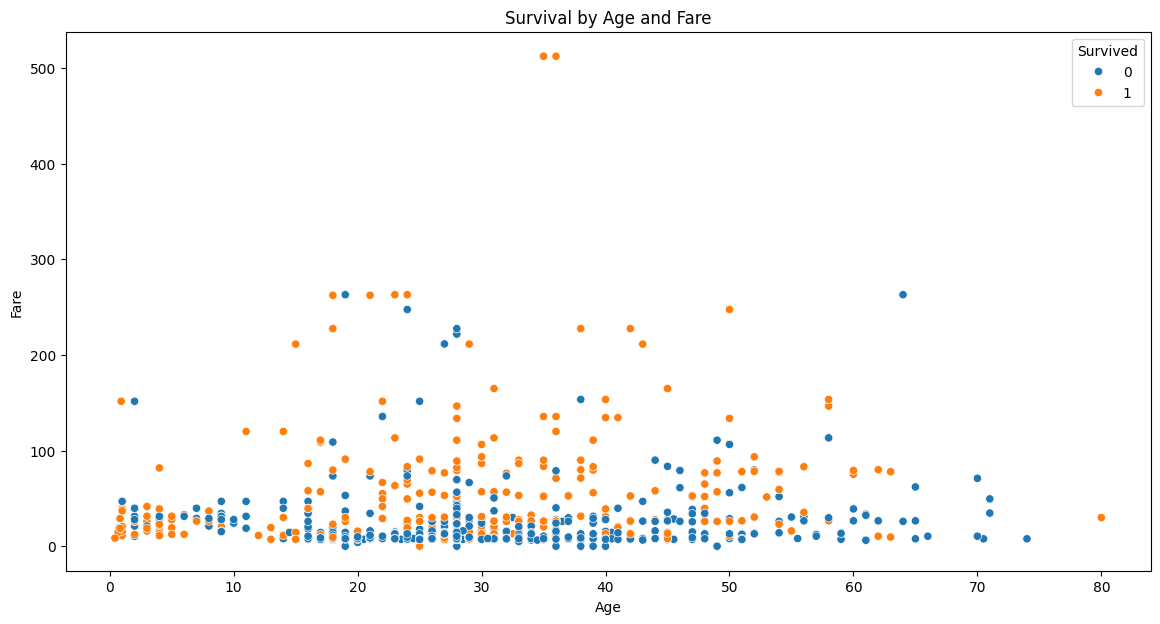

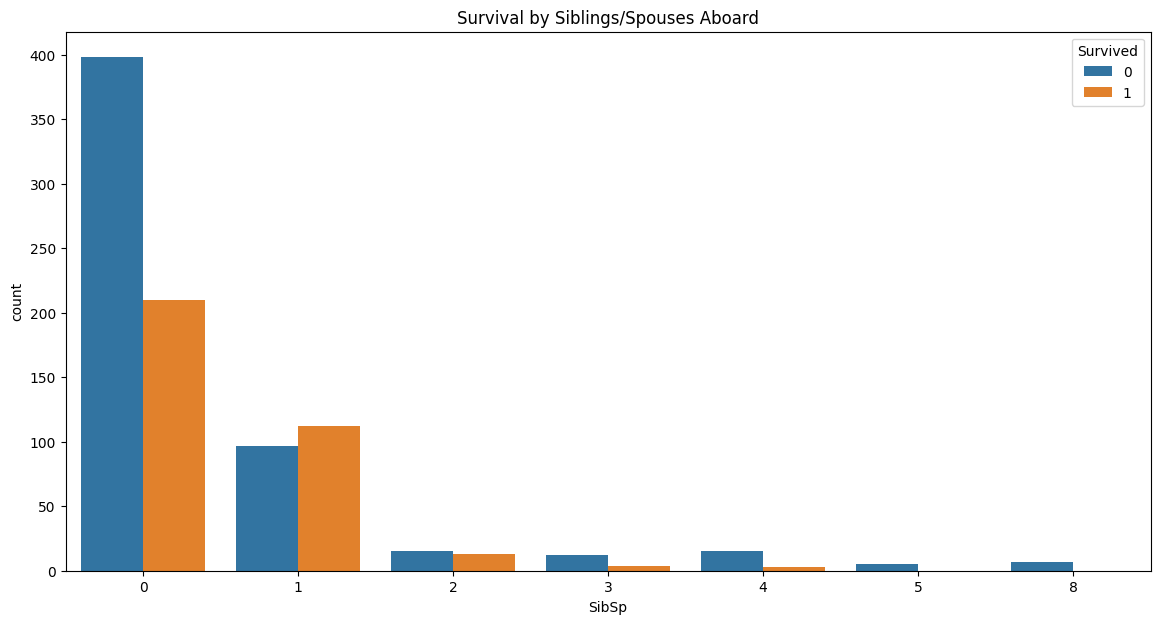

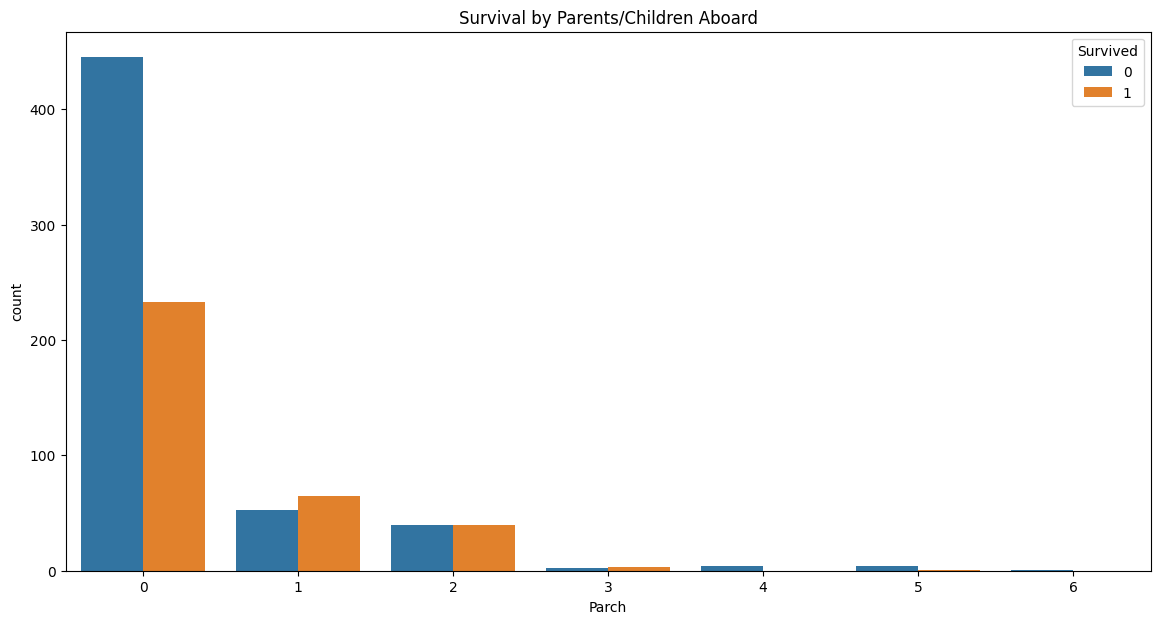

In [6]:
# Survival by Age and Fare
plt.figure(figsize=(14, 7))
sns.scatterplot(data=titanic_data, x='Age', y='Fare', hue='Survived')
plt.title('Survival by Age and Fare')
plt.show()

# Survival by Siblings/Spouses Aboard
plt.figure(figsize=(14, 7))
sns.countplot(data=titanic_data, x='SibSp', hue='Survived')
plt.title('Survival by Siblings/Spouses Aboard')
plt.show()

# Survival by Parents/Children Aboard
plt.figure(figsize=(14, 7))
sns.countplot(data=titanic_data, x='Parch', hue='Survived')
plt.title('Survival by Parents/Children Aboard')
plt.show()


## Feature Selection and Splitting Data
We select features and split the data into training and testing sets.


In [8]:
# Define feature matrix and target vector
X = titanic_data.drop(columns='Survived')
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Building and Training
We scale the features and train logistic regression and random forest models.


In [9]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression and Random Forest models
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Model Evaluation
We evaluate the models by calculating accuracy, displaying classification reports, and visualizing confusion matrices.


Logistic Regression Accuracy: 0.82
Random Forest Accuracy: 0.84
Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



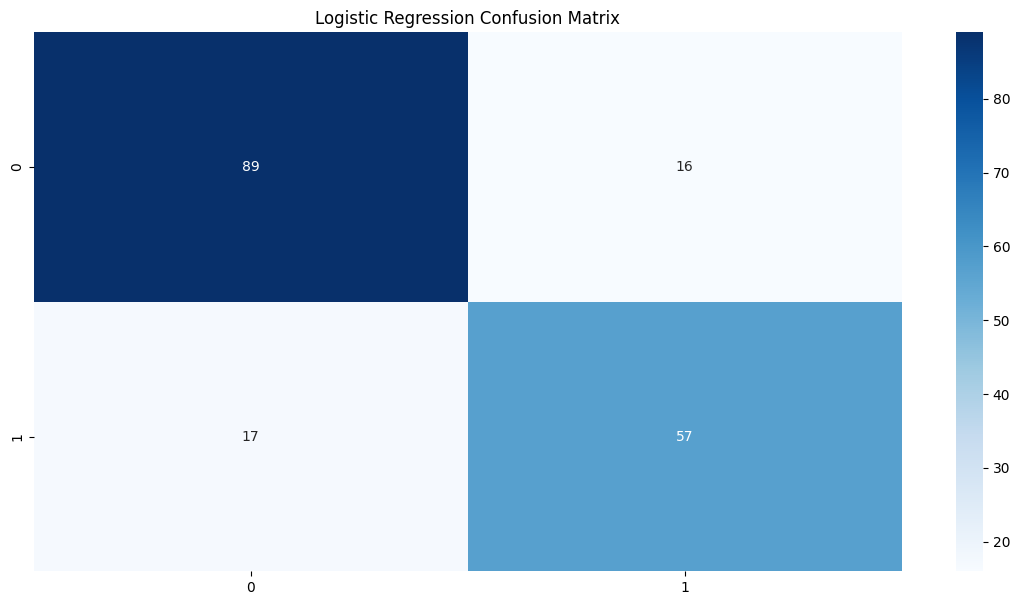

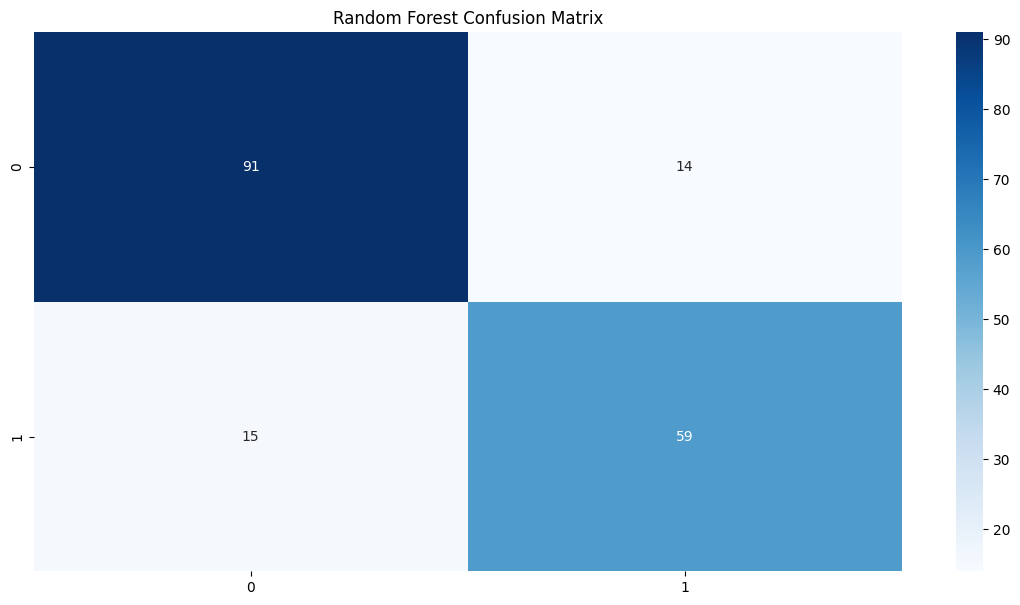

In [10]:
# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Calculate and print accuracy
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}')
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}')

# Display classification reports
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_log_reg))
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

# Confusion matrices
plt.figure(figsize=(14, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

plt.figure(figsize=(14, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()


## Processing Test Data and Making Predictions
We preprocess the test data, make predictions using the random forest model, and create a submission file.


In [13]:
# Load and preprocess test data
test_path = 'C:/Users/ACER/Downloads/archive (11)/Titanic-Dataset.csv'  # Ensure the correct path
test = pd.read_csv(test_path)

# Drop unnecessary columns
df2 = test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Fill missing values
df2['Age'] = imputer_age.transform(df2[['Age']])
df2['Fare'] = df2['Fare'].fillna(df2['Fare'].mean())

# Feature Engineering
df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1
df2['IsAlone'] = (df2['FamilySize'] == 1).astype(int)
df2['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df2['Title'] = df2['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
                                     'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df2['Title'] = df2['Title'].replace(['Mlle', 'Ms'], 'Miss')
df2['Title'] = df2['Title'].replace('Mme', 'Mrs')

# Encode categorical variables
df2 = pd.get_dummies(df2, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Ensure columns in test data match those in training data
missing_cols = set(X.columns) - set(df2.columns)
for col in missing_cols:
    df2[col] = 0
df2 = df2[X.columns]

# Feature Scaling
df2 = scaler.transform(df2)

# Make predictions on the test set
predictions = rf_model.predict(df2)

# Create submission file
submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": predictions})
submission.to_csv('submission.csv', index=False)


## Visualizing Predicted Values
We visualize the predicted survival count from the test data.


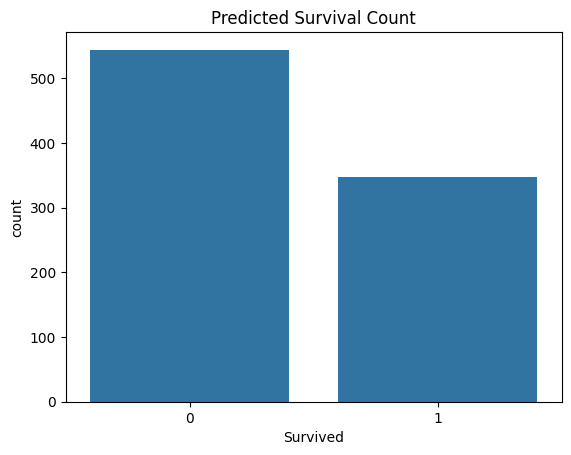

In [14]:
# Visualizing predicted values
sns.countplot(x='Survived', data=submission)
plt.title('Predicted Survival Count')
plt.show()


## Prediction using Random Forest Classifier
We use the trained Random Forest Classifier to predict whether a person survived the Titanic disaster based on input values. The model asks for values and then predicts survival accurately.


In [1]:
# Prediction using Random Forest Classifier

# Function to predict survival
def predict_survival():
    # Input values for prediction
    Pclass = int(input("Enter Pclass (1, 2, or 3): "))
    Sex = input("Enter Sex (male or female): ")
    Age = float(input("Enter Age: "))
    SibSp = int(input("Enter number of siblings/spouses aboard: "))
    Parch = int(input("Enter number of parents/children aboard: "))
    Fare = float(input("Enter Fare: "))
    Embarked = input("Enter Embarked (S, C, or Q): ")
    Title = input("Enter Title (Mr, Mrs, Miss, Master, Rare): ")
    
    # Create a DataFrame for the input
    input_data = pd.DataFrame({
        'Pclass': [Pclass],
        'Age': [Age],
        'SibSp': [SibSp],
        'Parch': [Parch],
        'Fare': [Fare],
        'FamilySize': [SibSp + Parch + 1],
        'IsAlone': [(SibSp + Parch + 1) == 1],
        'Sex_male': [1 if Sex == 'male' else 0],
        'Embarked_C': [1 if Embarked == 'C' else 0],
        'Embarked_Q': [1 if Embarked == 'Q' else 0],
        'Embarked_S': [1 if Embarked == 'S' else 0],
        'Title_Master': [1 if Title == 'Master' else 0],
        'Title_Miss': [1 if Title == 'Miss' else 0],
        'Title_Mr': [1 if Title == 'Mr' else 0],
        'Title_Mrs': [1 if Title == 'Mrs' else 0],
        'Title_Rare': [1 if Title == 'Rare' else 0]
    })
    
    # Ensure all required columns are present
    for col in X.columns:
        if col not in input_data.columns:
            input_data[col] = 0
    
    # Reorder columns to match training data
    input_data = input_data[X.columns]
    
    # Scale the input data
    input_data_scaled = scaler.transform(input_data)
    
    # Predict survival
    prediction = rf_model.predict(input_data_scaled)
    
    # Print the result
    if prediction[0] == 1:
        print("The person survived.")
    else:
        print("The person did not survive.")

# Call the function to predict survival
predict_survival()
